In [55]:
from compareSignalsTools import * 
import sys
sys.path.append(r'../../src')
from main import openFile


originalFilesPath = r"../../viblib"
convertedFilesPath = r"../../viblib/test"
convertedFilesOptPath = r"../../viblib/test/freqOptimiert20round/wav"

savePlotPath = r"../../src/compareSignals/plots/"

def savePlot(name):

    if not os.path.exists(savePlotPath):
        os.makedirs(savePlotPath)
        
    plt.savefig(savePlotPath + name + ".svg")
    plt.savefig(os.path.join(savePlotPath, name) + ".png")

files = find_common_wav_files(originalFilesPath, convertedFilesPath)
filesOpt = find_common_wav_files(originalFilesPath, convertedFilesOptPath)

# Frequenzbetrachtung

## Durchschnittliche Standartabweichung über alle .wav Dateien im Frequenzbereich

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib/test\v-09-10-6-27.wav exists.
Original um  35 samples gekürzt
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib/test\v-09-12-2-20.wav exists.
Original um  1 samples gekürzt
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib/test\v-09-12-8-30.wav exists.
Original um  4 samples gekürzt
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib/test\v-09-18-4-18.wav exists.
Original um  27 samples gekürzt
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib/test\v-10-10-1-10.wav exists.
Original um  15 samples gekürzt
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib/test\v-10-21-3-11.wav exists.
Original um  22 samples gekürzt
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib/test\v-09-10-6-43.wav exists.
Original um  23 samples gekürzt
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib/test\v-10-21-3-2.wav exists.
Original um  11 samples gekürzt
File ../../viblib\v-

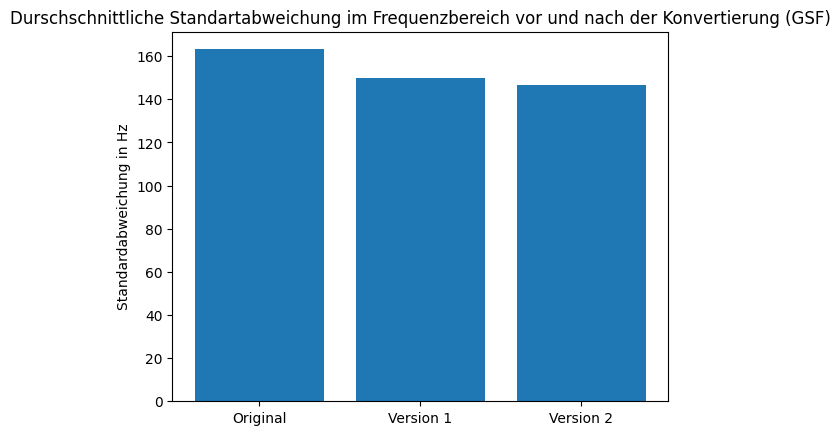

In [56]:
import matplotlib.pyplot as plt
from compareSignalsTools import * 



StandardDerivationOrg, StandardDerivationConverted = meanFrequencyStandardDerivation(files)
_ , StandardDerivationConvertedOpt = meanFrequencyStandardDerivation(filesOpt)

plt.bar(["Original", "Version 1","Version 2"], [StandardDerivationOrg, StandardDerivationConverted,StandardDerivationConvertedOpt])
plt.title("Durschschnittliche Standartabweichung im Frequenzbereich vor und nach der Konvertierung (GSF)")
plt.ylabel("Standardabweichung in Hz")
savePlot("StandardDeviation")

print("StandardDerivationConverted",StandardDerivationConverted,"StandardDerivationOrg",StandardDerivationOrg,"StandardDerivationConvertedOpt",StandardDerivationConvertedOpt)

## Mean Absolut Error Frequenz

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib\v-09-23-6-24.wav exists.
File ../../viblib\v-10-28-7-29.wav exists.
File ../../viblib\v-09-11-4-3.wav exists.
File ../../viblib\v-10-09-1-1.wav exists.
File ../../viblib\v-09-10-12-16.wav exists.
File ../../viblib\v-10-21-3-30.wav exists.
File ../../viblib\v-10-28-7-22.wav exists.
File ../../viblib\v-09-11-4-41.wav exists.
File ../../viblib\v-09-11-3-12.wav exists.
File ../../viblib\v-10-28-7-31.wav exists.
File ../../viblib\v-09-10-6-59.wav exists.
File ../../viblib\v-09-10-8-5.wav exists.
File ../../viblib\v-09-16-1-56.wav exists.
File ../../viblib\v-10-21-2-48.wav exists.
File ../../viblib\v-09-11-3-56.wav exists.
File ../../vib

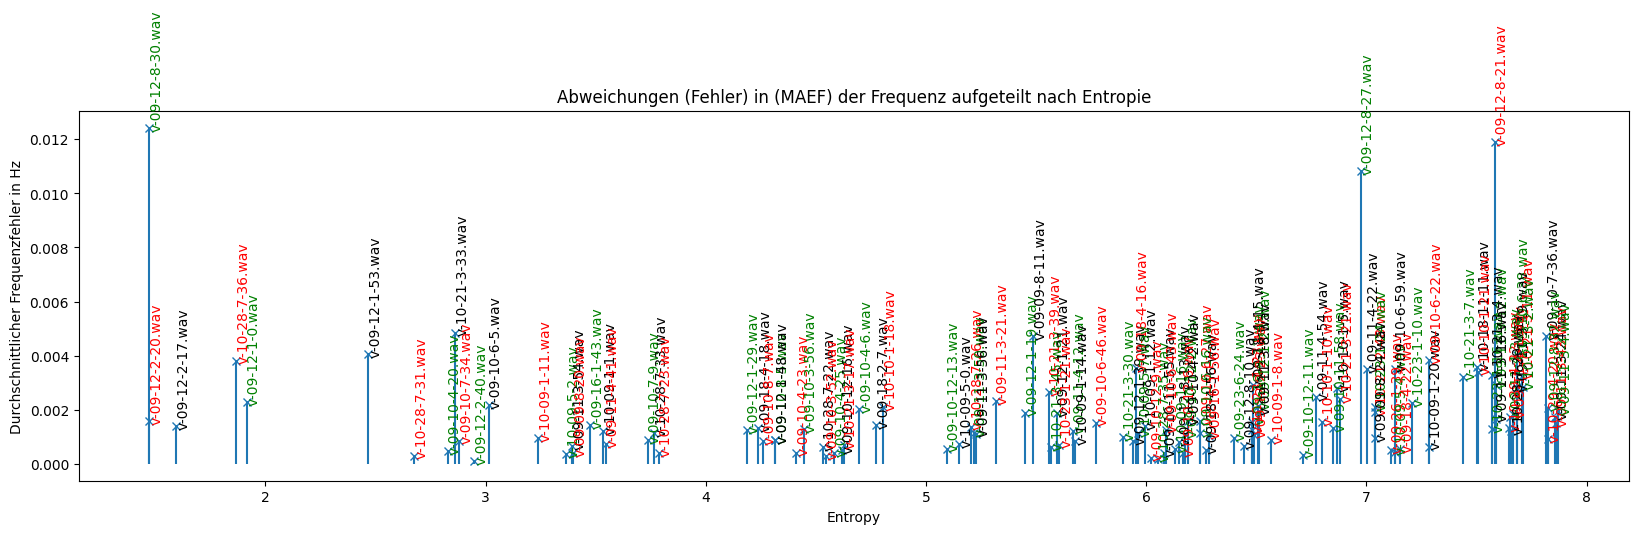

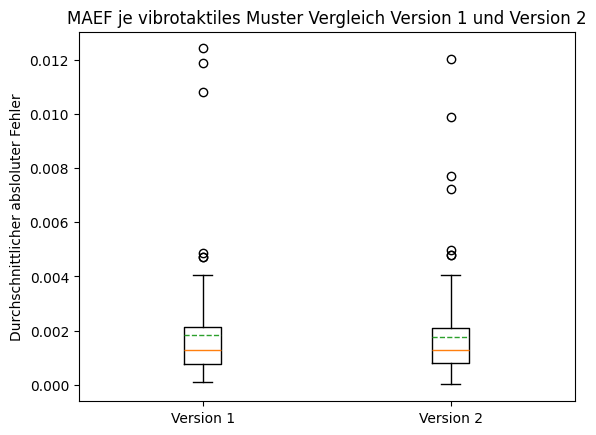

In [57]:
import os
f=sortByEntropy(files)
f2=sortByEntropy(filesOpt)
print(f)
meanError, errors = meanFrequencyError( [c[0], c[1]] for c in f )
meanErrorOpt, errorsOpt = meanFrequencyError( [c[0], c[1]] for c in f2 )

plt.figure().set_figwidth(20)
plt.plot([float(c[2]) for c in f],errors,'x')
plt.vlines([float(c[2]) for c in f],0,errors)
plt.title("Abweichungen (Fehler) in (MAEF) der Frequenz aufgeteilt nach Entropie")
plt.xlabel("Entropy")
plt.ylabel("Durchschnittlicher Frequenzfehler in Hz")
for i, c in enumerate(f):
    if i %3 == 0:
        color = "red"
    elif i %3 == 1:
        color = "green"
    else:
        color = "black"
    plt.text(float(c[2]),errors[i], os.path.basename(c[0]), rotation=90, color=color)

savePlot("MeanErrorFrequency")

meanAbsolutFrequencyError=numpy.mean(errors)
print("mean absolut error",meanAbsolutFrequencyError)

plt.figure()
plt.boxplot([errors,errorsOpt],showmeans=True, meanline=True)
plt.xticks([1,2],["Version 1","Version 2"])
plt.ylabel("Durchschnittlicher absloluter Fehler")
plt.title("MAEF je vibrotaktiles Muster Vergleich Version 1 und Version 2")


print("MAEFV1",meanError,"MAEFV2",meanErrorOpt)
print("MAEFV1 standartabweichung",numpy.std(errors),"MAEFV2 standartabweichung",numpy.std(errorsOpt))


# Betrachtung der Energie

## Durschnittliche Standartabweichung der Energie des Signals

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib/test\v-09-10-6-27.wav exists.
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib/test\v-09-12-2-20.wav exists.
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib/test\v-09-12-8-30.wav exists.
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib/test\v-09-18-4-18.wav exists.
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib/test\v-10-10-1-10.wav exists.
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib/test\v-10-21-3-11.wav exists.
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib/test\v-09-10-6-43.wav exists.
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib/test\v-10-21-3-2.wav exists.
File ../../viblib\v-09-23-6-24.wav exists.
File ../../viblib/test\v-09-23-6-24.wav exists.
File ../../viblib\v-10-28-7-29.wav exists.
File ../../viblib/test\v-10-28-7-29.wav exists.
File ../../viblib\v-09-11-4-3.wav exists.
File ../../viblib/test\v-09-11-4-3.wav exists.
Fil

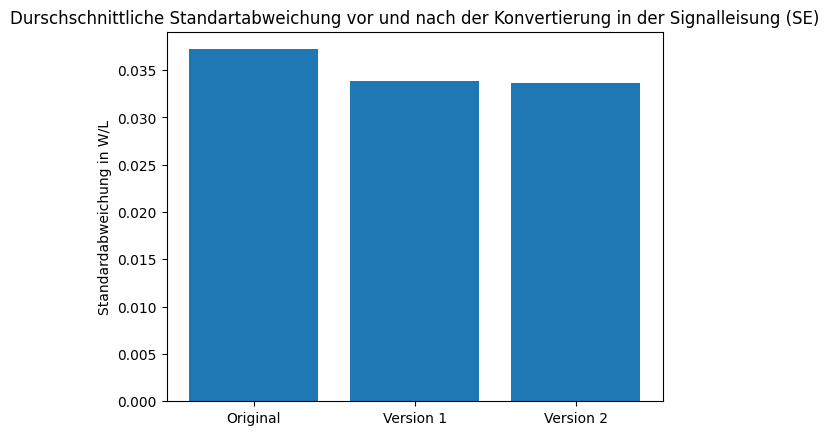

In [58]:
StandardDerivationOrg, StandardDerivationConverted = meanPowerStandardDerivation(files)
_, StandardDerivationConvertedOpt = meanPowerStandardDerivation(filesOpt)

plt.bar(["Original", "Version 1", "Version 2"], [StandardDerivationOrg, StandardDerivationConverted, StandardDerivationConvertedOpt])

plt.title("Durschschnittliche Standartabweichung vor und nach der Konvertierung in der Signalleisung (SE)")
plt.ylabel("Standardabweichung in W/L")
savePlot("StandardDeviationPower")
print("StandardDerivationConverted",StandardDerivationConverted,"StandardDerivationOrg",StandardDerivationOrg,"StandardDerivationConvertedOpt",StandardDerivationConvertedOpt)

## Durchschnittliche Frequenz

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib/test\v-09-10-6-27.wav exists.
Original um  35 samples gekürzt
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib/test\v-09-12-2-20.wav exists.
Original um  1 samples gekürzt
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib/test\v-09-12-8-30.wav exists.
Original um  4 samples gekürzt
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib/test\v-09-18-4-18.wav exists.
Original um  27 samples gekürzt
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib/test\v-10-10-1-10.wav exists.
Original um  15 samples gekürzt
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib/test\v-10-21-3-11.wav exists.
Original um  22 samples gekürzt
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib/test\v-09-10-6-43.wav exists.
Original um  23 samples gekürzt
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib/test\v-10-21-3-2.wav exists.
Original um  11 samples gekürzt
File ../../viblib\v-

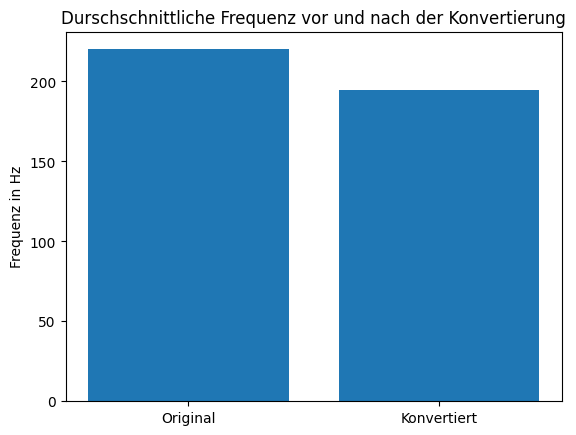

In [59]:
meanFrequenciesOrg, meanFrequenciesConverted = meanFrequencies(files)

plt.bar(["Original", "Konvertiert"], [meanFrequenciesOrg, meanFrequenciesConverted])

plt.title("Durschschnittliche Frequenz vor und nach der Konvertierung")
plt.ylabel("Frequenz in Hz")

savePlot("meanFrequency")

print("meanorg", meanFrequenciesOrg, "meanconv", meanFrequenciesConverted)

## Durchschnittlicher Fehler (Mean Absolute Error) des Effektivwertes

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib\v-09-23-6-24.wav exists.
File ../../viblib\v-10-28-7-29.wav exists.
File ../../viblib\v-09-11-4-3.wav exists.
File ../../viblib\v-10-09-1-1.wav exists.
File ../../viblib\v-09-10-12-16.wav exists.
File ../../viblib\v-10-21-3-30.wav exists.
File ../../viblib\v-10-28-7-22.wav exists.
File ../../viblib\v-09-11-4-41.wav exists.
File ../../viblib\v-09-11-3-12.wav exists.
File ../../viblib\v-10-28-7-31.wav exists.
File ../../viblib\v-09-10-6-59.wav exists.
File ../../viblib\v-09-10-8-5.wav exists.
File ../../viblib\v-09-16-1-56.wav exists.
File ../../viblib\v-10-21-2-48.wav exists.
File ../../viblib\v-09-11-3-56.wav exists.
File ../../vib

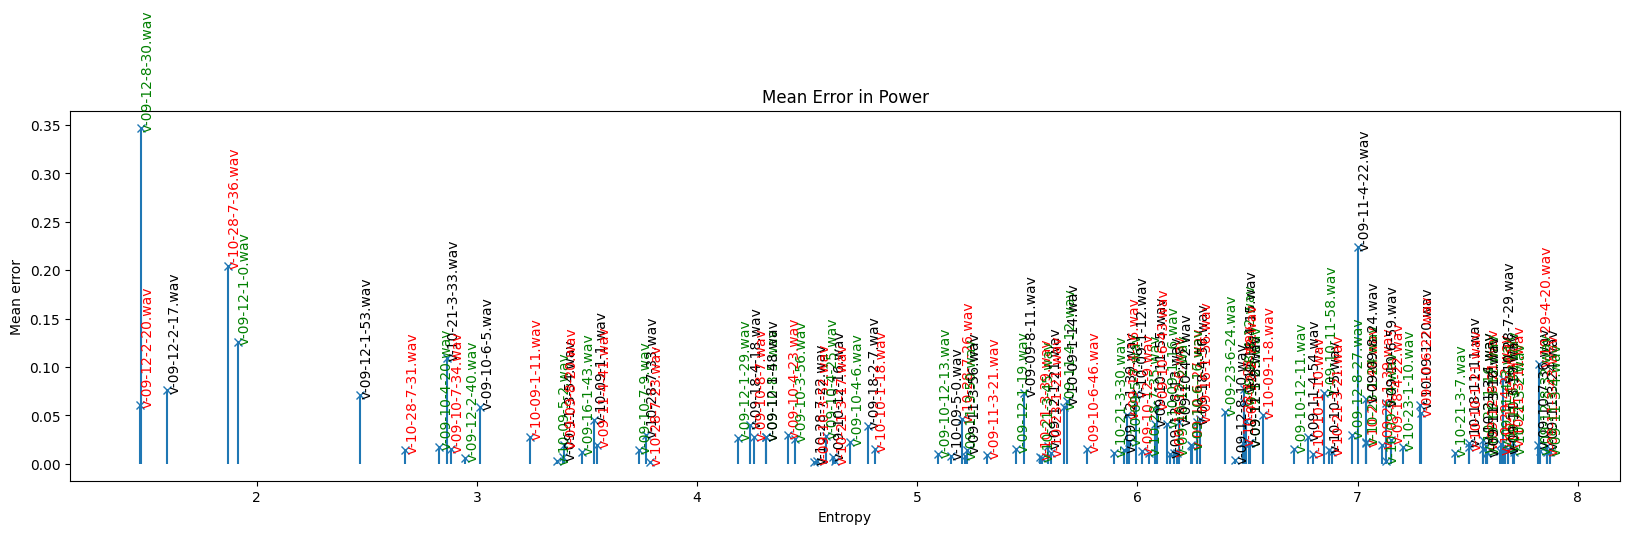

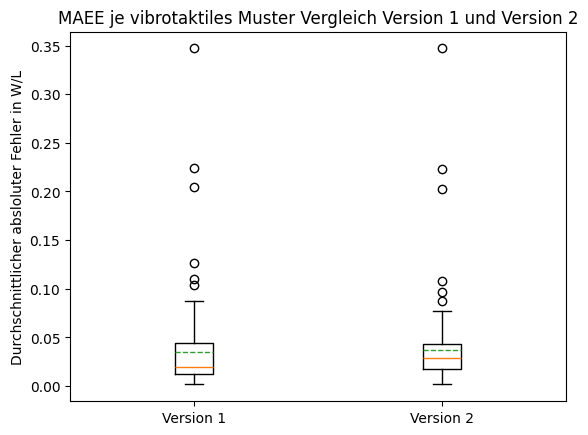

In [60]:
import os
f=sortByEntropy(files)
f2=sortByEntropy(filesOpt)
meanError, errors = meanPowerError( [c[0], c[1]] for c in f )
MeanErrorOpt, errorsOpt = meanPowerError( [c[0], c[1]] for c in f2 )

plt.figure().set_figwidth(20)
plt.plot([float(c[2]) for c in f],errors,'x')
plt.vlines([float(c[2]) for c in f],0,errors)
plt.title("Mean Error in Power")
plt.xlabel("Entropy")
plt.ylabel("Mean error")
for i, c in enumerate(f):
    if i %3 == 0:
        color = "red"
    elif i %3 == 1:
        color = "green"
    else:
        color = "black"
    plt.text(float(c[2]),errors[i], os.path.basename(c[0]), rotation=90, color=color)

savePlot("MeanErrorPower")

plt.figure()
plt.boxplot([errors,errorsOpt],showmeans=True, meanline=True)
plt.xticks([1,2],["Version 1","Version 2"])
plt.ylabel("Durchschnittlicher absloluter Fehler in W/L")
plt.title("MAEE je vibrotaktiles Muster Vergleich Version 1 und Version 2")

print("mean absolut error V1",meanError, "Mean absolut error V2",MeanErrorOpt)
print("V1 standartabweichung",numpy.std(errors), "V2 standartabweichung",numpy.std(errorsOpt))

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib/test\v-09-10-6-27.wav exists.
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib/test\v-09-12-2-20.wav exists.
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib/test\v-09-12-8-30.wav exists.
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib/test\v-09-18-4-18.wav exists.
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib/test\v-10-10-1-10.wav exists.
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib/test\v-10-21-3-11.wav exists.
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib/test\v-09-10-6-43.wav exists.
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib/test\v-10-21-3-2.wav exists.
File ../../viblib\v-09-23-6-24.wav exists.
File ../../viblib/test\v-09-23-6-24.wav exists.
File ../../viblib\v-10-28-7-29.wav exists.
File ../../viblib/test\v-10-28-7-29.wav exists.
File ../../viblib\v-09-11-4-3.wav exists.
File ../../viblib/test\v-09-11-4-3.wav exists.
Fil

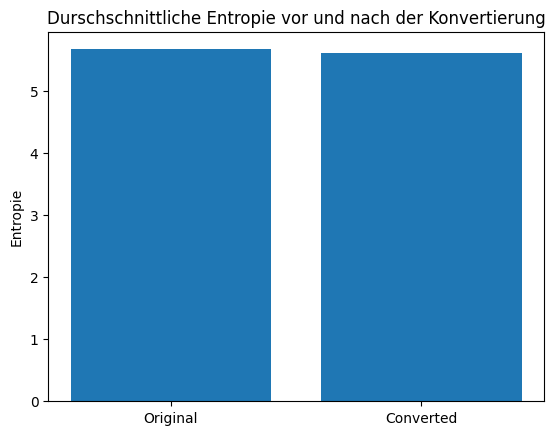

In [61]:
entropyOrg, entropyConverted = meanEntropy(files)

plt.bar(["Original", "Converted"], [entropyOrg, entropyConverted])

plt.title("Durschschnittliche Entropie vor und nach der Konvertierung")
plt.ylabel("Entropie")

savePlot("meanEntropy")

File ../../viblib\v-09-10-6-27.wav exists.
File ../../viblib/test\v-09-10-6-27.wav exists.
File ../../viblib\v-09-12-2-20.wav exists.
File ../../viblib/test\v-09-12-2-20.wav exists.
File ../../viblib\v-09-12-8-30.wav exists.
File ../../viblib/test\v-09-12-8-30.wav exists.
File ../../viblib\v-09-18-4-18.wav exists.
File ../../viblib/test\v-09-18-4-18.wav exists.
File ../../viblib\v-10-10-1-10.wav exists.
File ../../viblib/test\v-10-10-1-10.wav exists.
File ../../viblib\v-10-21-3-11.wav exists.
File ../../viblib/test\v-10-21-3-11.wav exists.
File ../../viblib\v-09-10-6-43.wav exists.
File ../../viblib/test\v-09-10-6-43.wav exists.
File ../../viblib\v-10-21-3-2.wav exists.
File ../../viblib/test\v-10-21-3-2.wav exists.
File ../../viblib\v-09-23-6-24.wav exists.
File ../../viblib/test\v-09-23-6-24.wav exists.
File ../../viblib\v-10-28-7-29.wav exists.
File ../../viblib/test\v-10-28-7-29.wav exists.
File ../../viblib\v-09-11-4-3.wav exists.
File ../../viblib/test\v-09-11-4-3.wav exists.
Fil

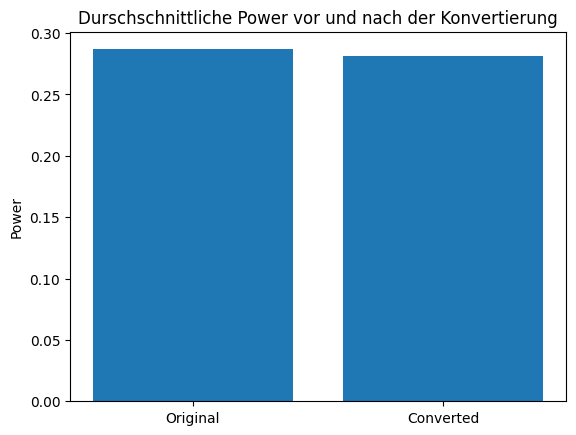

In [62]:
meanPowerOrg, meanPowerConverted = meanPower(files)

plt.bar(["Original", "Converted"], [meanPowerOrg, meanPowerConverted])

plt.title("Durschschnittliche Power vor und nach der Konvertierung")
plt.ylabel("Power")

savePlot("meanPower")

# Testing

File ../../viblib\v-09-16-1-56.wav exists.
File ../../viblib/test\v-09-16-1-56.wav exists.
Original um  14 samples gekürzt
348.6896084805583


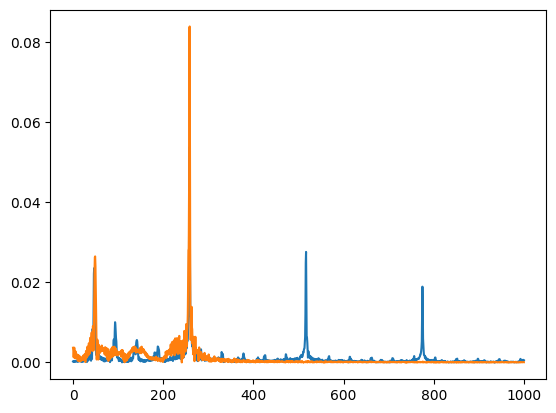

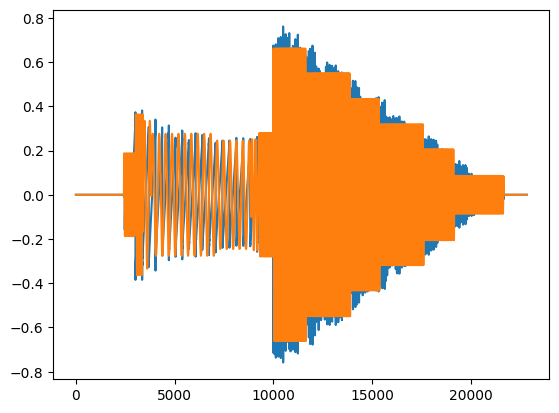

In [63]:

signal1, sr = openFile(files[20][0])
signal2, sr = openFile(files[20][1])


frequencies, fft1, fft2 = fft(signal1, signal2, sr)

print(numpy.average(frequencies, weights=fft1))

plt.plot(frequencies,fft1)
plt.plot(frequencies,fft2)

plt.figure()
plt.plot(signal1)
plt.plot(signal2)
